# **Task 2: Exploratory Data Analysis (EDA) – Univariate, Bivariate and** **Multivariate Analysis**



Import Required Libraries Load & Prepare Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load
df = pd.read_csv("Global YouTube Statistics.csv", encoding="latin1", low_memory=False)

# basic cleaning example
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# check
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video_views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

# **1. Conduct Univariate Analysis to study the distribution and characteristics of individual variables such as Subscribers, Views, Earnings, Country, and Category.**

**UNIVARIATE ANALYSIS**

Study one variable at a time

Distribution of Subscribers

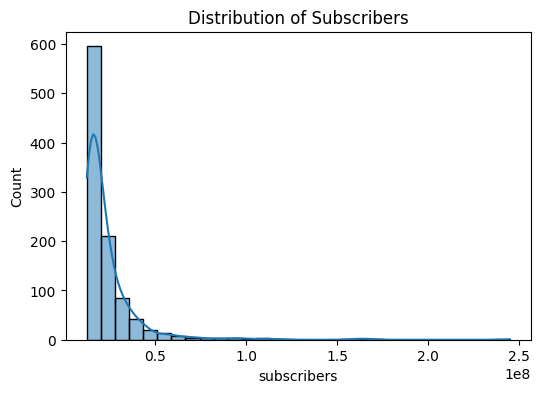

In [2]:
plt.figure(figsize=(6,4))
sns.histplot(df['subscribers'], bins=30, kde=True)
plt.title("Distribution of Subscribers")
plt.show()

**Insight**

Most channels are concentrated in the lower subscriber range, while very few channels have extremely high subscribers, creating a right-skewed distribution. These top creators dominate platform influence.

Distribution of Video Views

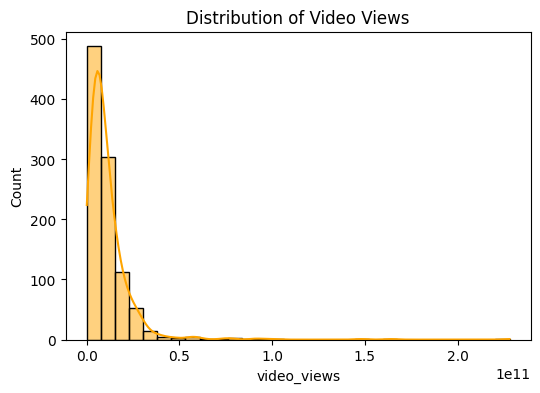

In [3]:
plt.figure(figsize=(6,4))
sns.histplot(df['video_views'], bins=30, kde=True, color='orange')
plt.title("Distribution of Video Views")
plt.show()

**Insight**

Views show heavy inequality. A small number of channels capture the majority of total watch time.

Distribution of Earnings

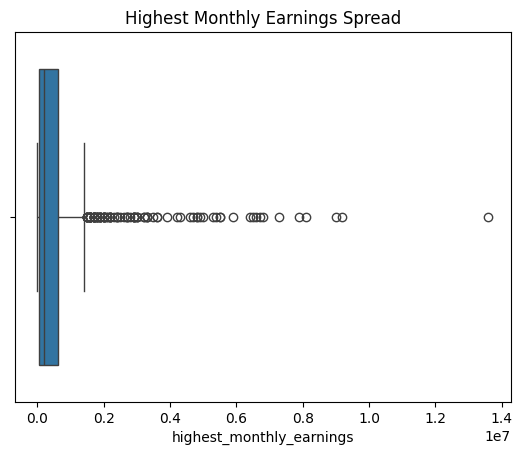

In [4]:
sns.boxplot(x=df['highest_monthly_earnings'])
plt.title("Highest Monthly Earnings Spread")
plt.show()

**Insight**

Large number of outliers indicate that a few creators earn exceptionally high revenue compared to the median.

Top Categories

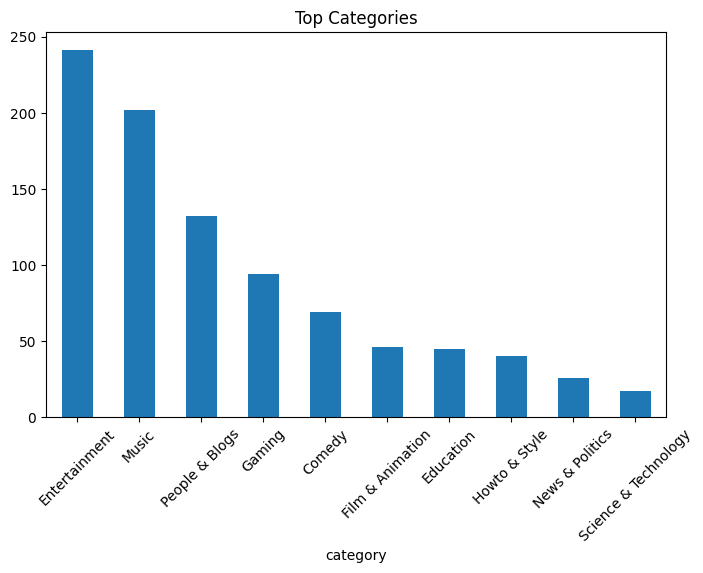

In [5]:
plt.figure(figsize=(8,5))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title("Top Categories")
plt.xticks(rotation=45)
plt.show()

**Insight**

Music and Entertainment typically dominate, showing strong audience preference.

Channels by Country

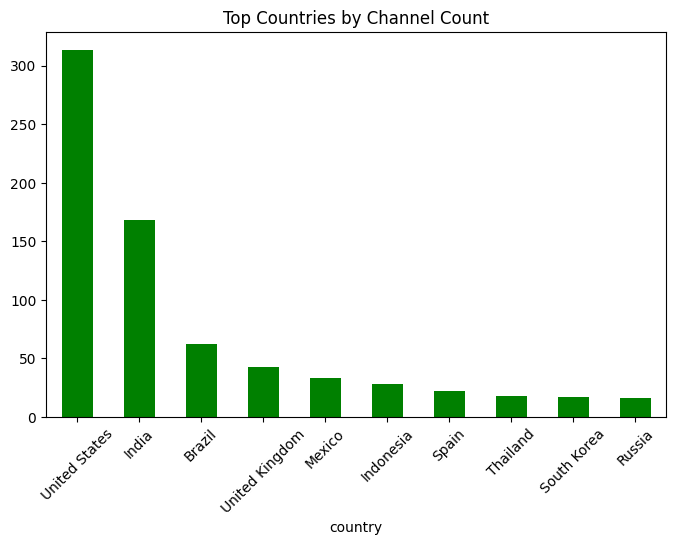

In [6]:
plt.figure(figsize=(8,5))
df['country'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top Countries by Channel Count")
plt.xticks(rotation=45)
plt.show()

**Insight**

The dataset is dominated by a few countries, reflecting regional concentration of large creators.

# **2. Perform Bivariate Analysis to explore relationships between pairs of variables, for example:**

# **○ Subscribers vs Views**

# **○ Earnings vs Subscribers**

# **○ Category vs Average Views**

# **○ Country vs Number of Channels**

**BIVARIATE ANALYSIS**

Relationship between two variables

Subscribers vs Video Views

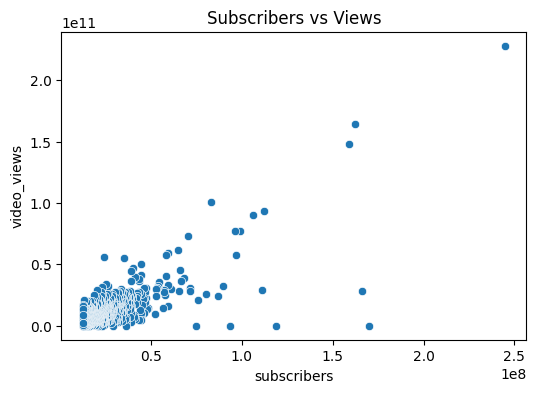

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='subscribers', y='video_views', data=df)
plt.title("Subscribers vs Views")
plt.show()

**Insight**

A strong positive relationship is visible. More subscribers usually lead to higher total views, though some channels outperform relative to their size.

Earnings vs Subscribers

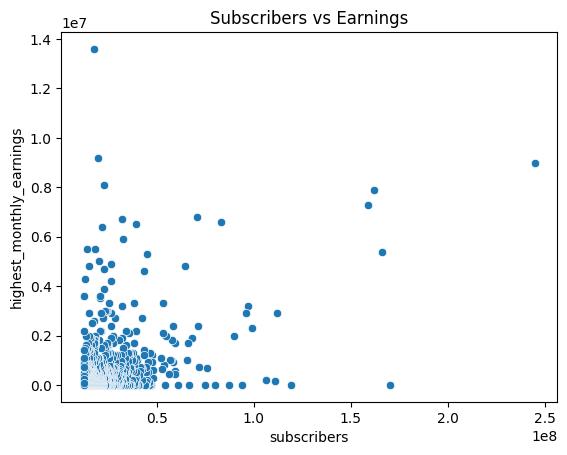

In [8]:
sns.scatterplot(x='subscribers', y='highest_monthly_earnings', data=df)
plt.title("Subscribers vs Earnings")
plt.show()

**Insight**

Revenue generally increases with subscribers, but variability suggests monetization strategy matters.

Category vs Average Views

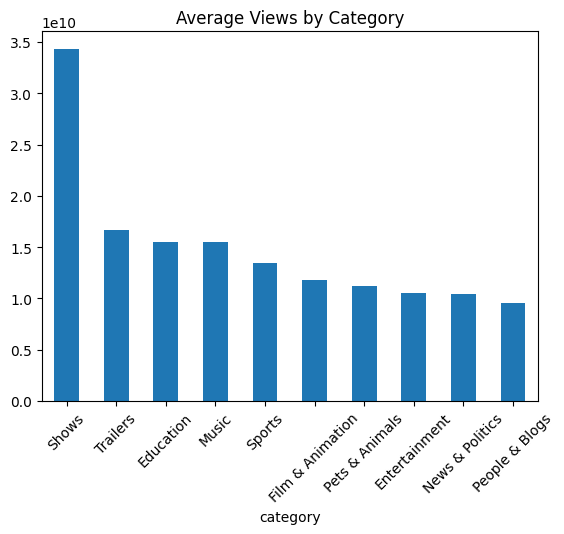

In [9]:
cat_views = df.groupby('category')['video_views'].mean().sort_values(ascending=False).head(10)

cat_views.plot(kind='bar')
plt.title("Average Views by Category")
plt.xticks(rotation=45)
plt.show()

**Insight**

Some categories generate far more engagement per channel, indicating better advertisement potential.

Country vs Number of Channels

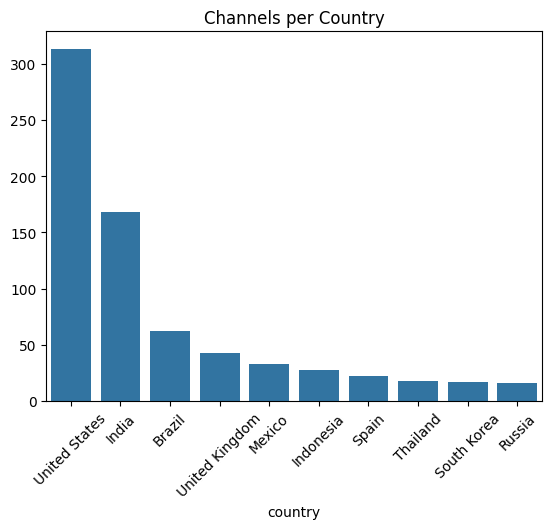

In [10]:
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45)
plt.title("Channels per Country")
plt.show()

**Insight**

A few nations dominate global YouTube presence, suggesting mature creator ecosystems.

Uploads vs Views

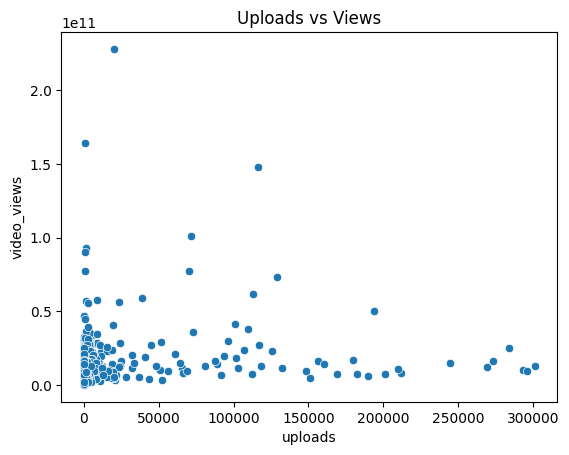

In [11]:
sns.scatterplot(x='uploads', y='video_views', data=df)
plt.title("Uploads vs Views")
plt.show()

**Insight**

More uploads can help increase views, but high output does not always guarantee high popularity.

# **3. Perform Multivariate Analysis to analyze interactions among more than two variables using techniques such as correlation analysis, pairwise relationships, and category-based comparisons.**

**MULTIVARIATE ANALYSIS**

More than two variables

Correlation Heatmap

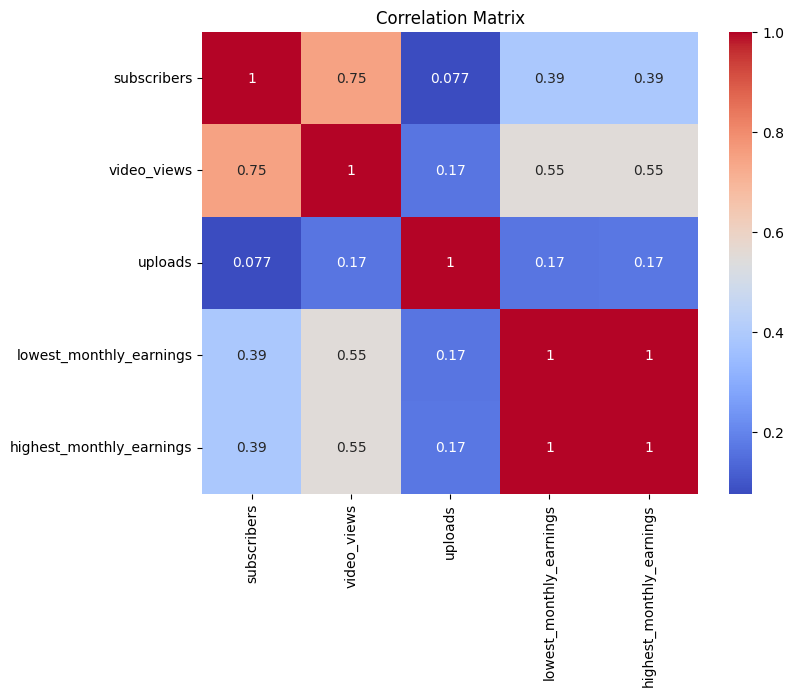

In [12]:
plt.figure(figsize=(8,6))
num_cols = ['subscribers','video_views','uploads',
            'lowest_monthly_earnings','highest_monthly_earnings']

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Insight**

Subscribers and views are highly correlated. Earnings strongly depend on both.

Pairplot

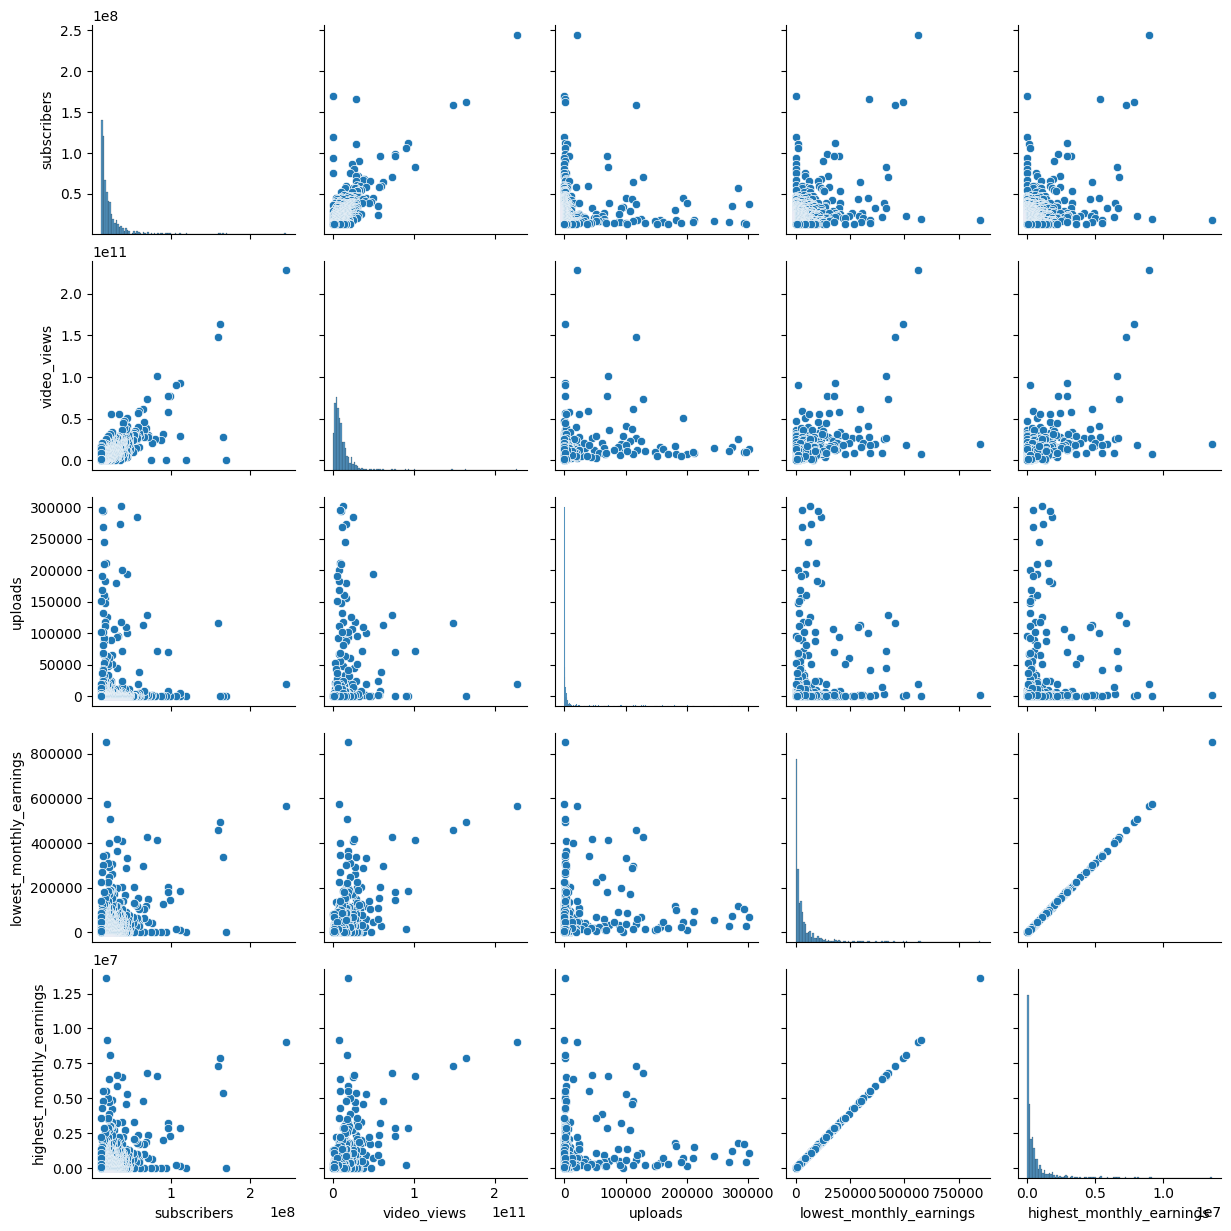

In [13]:
sns.pairplot(df[num_cols])
plt.show()

**Insight**

Confirms linear trends and reveals extreme outliers among top channels.

Category + Subscribers + Earnings

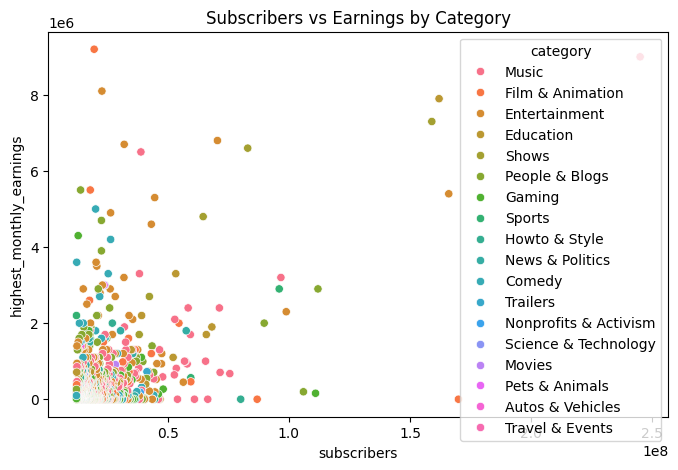

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='subscribers',
                y='highest_monthly_earnings',
                hue='category')
plt.title("Subscribers vs Earnings by Category")
plt.show()

**Insight**

For the same subscriber count, certain categories earn more, showing differences in CPM and sponsorship markets.

Country + Subscribers Distribution

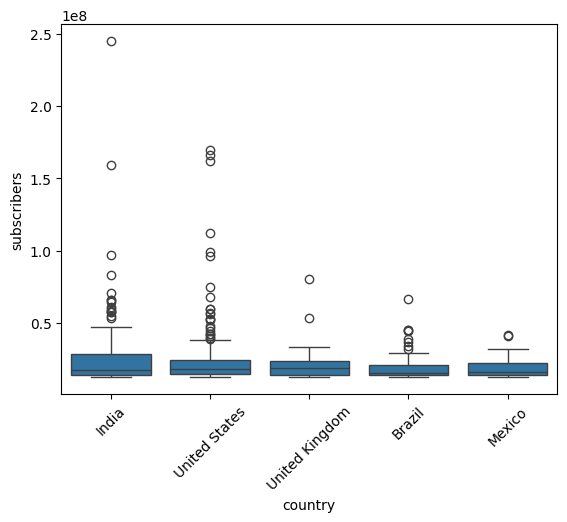

In [15]:
top_countries = df['country'].value_counts().head(5).index
sns.boxplot(data=df[df['country'].isin(top_countries)],
            x='country', y='subscribers')
plt.xticks(rotation=45)
plt.show()

**Insight**

Subscriber levels vary widely within countries; some regions produce ultra-large influencers.

Category vs Upload Frequency vs Views

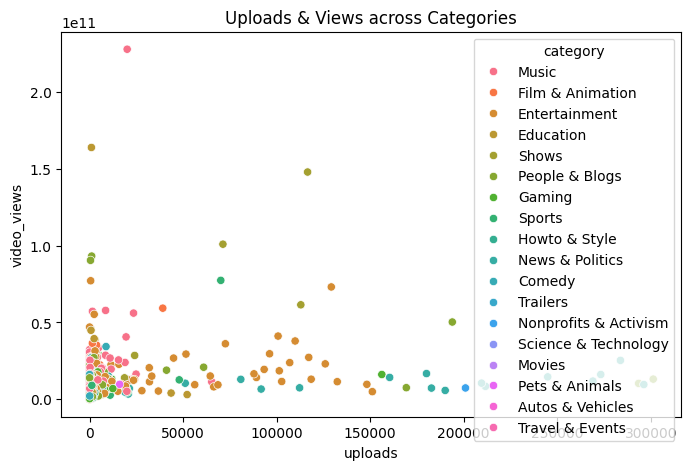

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='uploads', y='video_views', hue='category')
plt.title("Uploads & Views across Categories")
plt.show()

**Insight**

Certain niches benefit more from frequent posting, while others rely on fewer but viral uploads.

# **4. Perform at least 10 to 15 visual-based analyses using Seaborn or Matplotlib to support your findings.**

1) Top 10 Channels by Subscribers

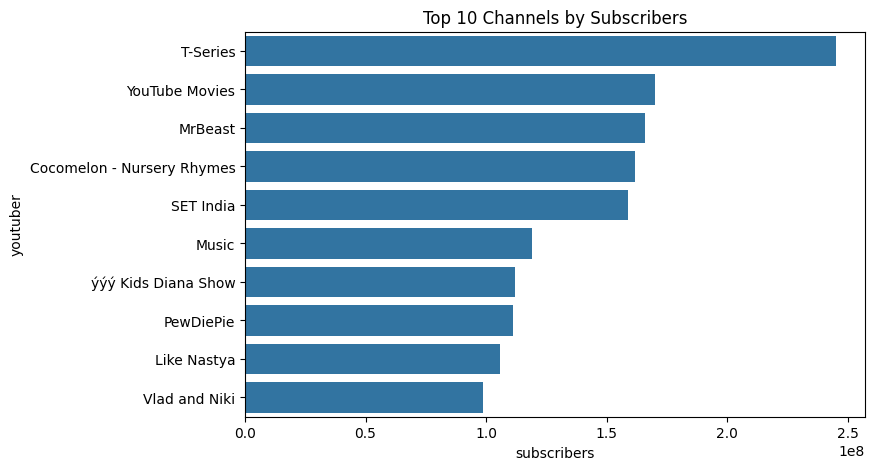

In [17]:
top_subs = df.sort_values(by='subscribers', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_subs['youtuber'], x=top_subs['subscribers'])
plt.title("Top 10 Channels by Subscribers")
plt.show()

2) Top 10 Channels by Views

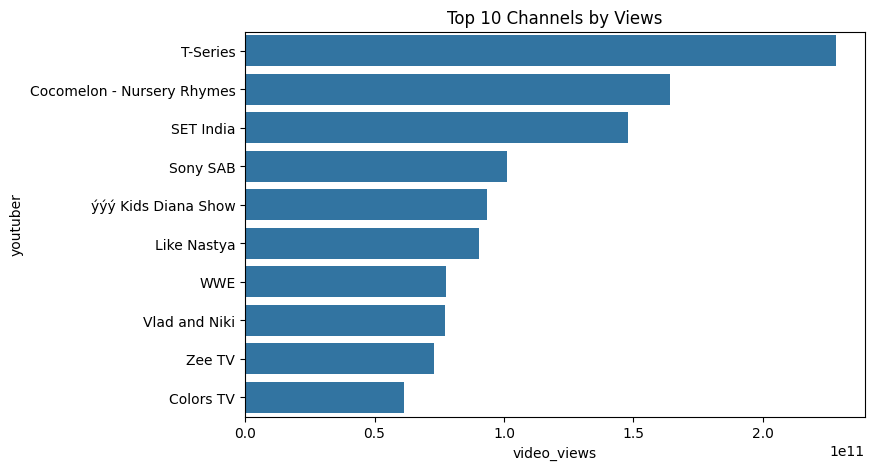

In [18]:
top_views = df.sort_values(by='video_views', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_views['youtuber'], x=top_views['video_views'])
plt.title("Top 10 Channels by Views")
plt.show()

3) Category Share (Pie Chart)

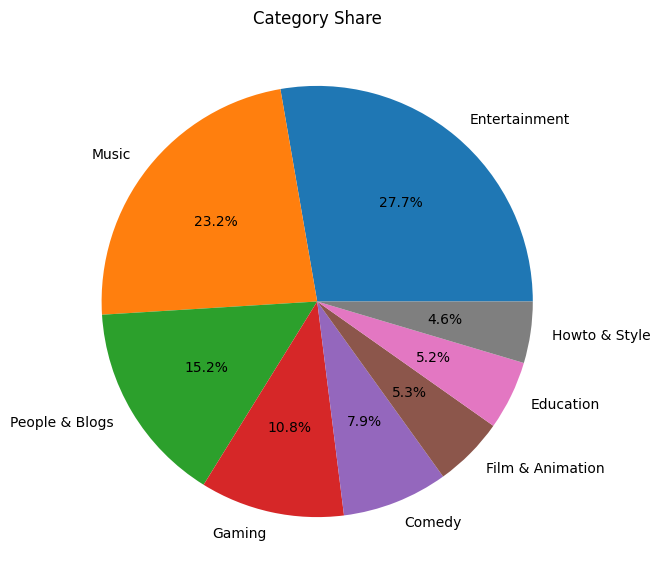

In [19]:
plt.figure(figsize=(7,7))
df['category'].value_counts().head(8).plot.pie(autopct='%1.1f%%')
plt.title("Category Share")
plt.ylabel("")
plt.show()

4) Country Share (Pie Chart)

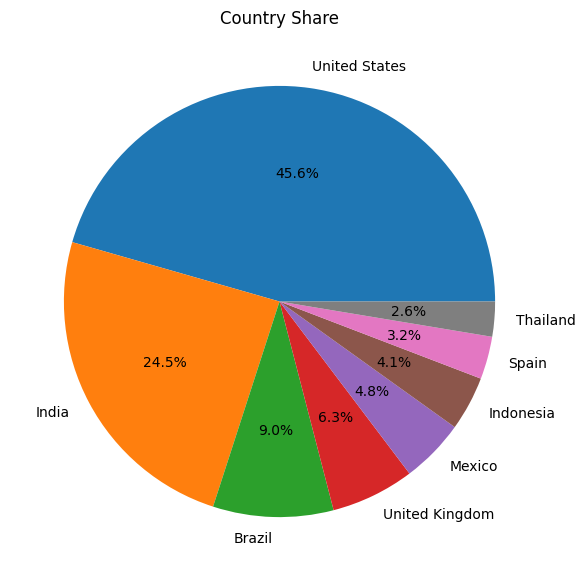

In [20]:
plt.figure(figsize=(7,7))
df['country'].value_counts().head(8).plot.pie(autopct='%1.1f%%')
plt.title("Country Share")
plt.ylabel("")
plt.show()

5) Cumulative Subscribers Distribution

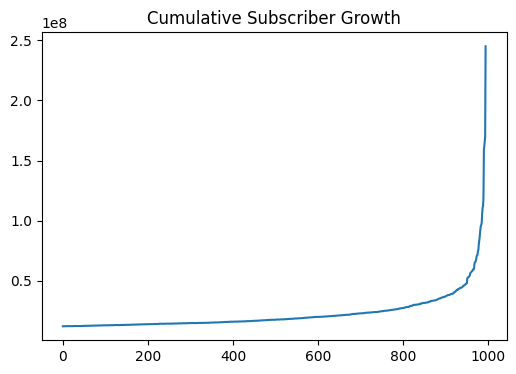

In [21]:
sorted_subs = np.sort(df['subscribers'])

plt.figure(figsize=(6,4))
plt.plot(sorted_subs)
plt.title("Cumulative Subscriber Growth")
plt.show()

6) Average Earnings per Category

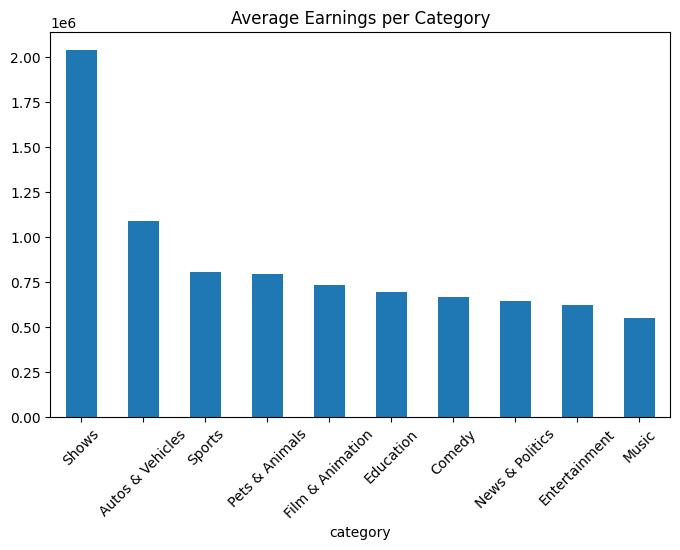

In [22]:
plt.figure(figsize=(8,5))
df.groupby('category')['highest_monthly_earnings'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Average Earnings per Category")
plt.xticks(rotation=45)
plt.show()

7) Median Subscribers per Category

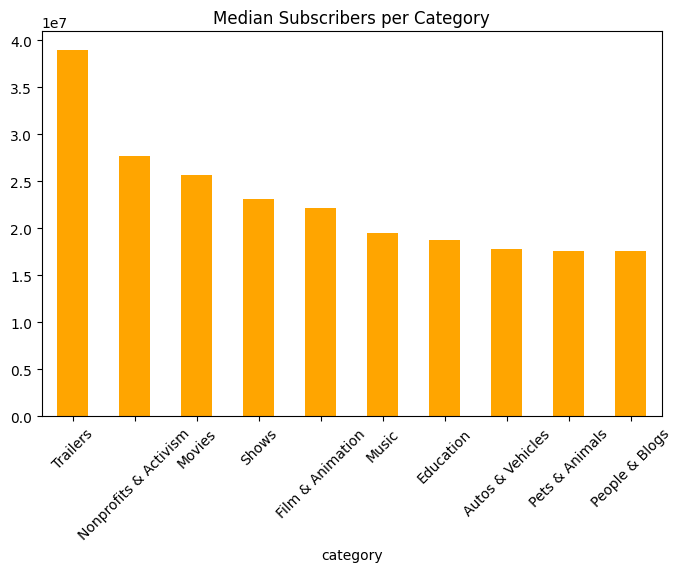

In [23]:
plt.figure(figsize=(8,5))
df.groupby('category')['subscribers'].median().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title("Median Subscribers per Category")
plt.xticks(rotation=45)
plt.show()

8) Views per Upload

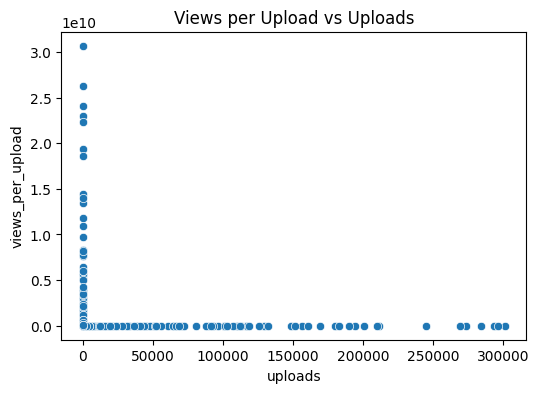

In [24]:
df['views_per_upload'] = df['video_views'] / df['uploads']

plt.figure(figsize=(6,4))
sns.scatterplot(x='uploads', y='views_per_upload', data=df)
plt.title("Views per Upload vs Uploads")
plt.show()

9) Earnings Range (High vs Low)

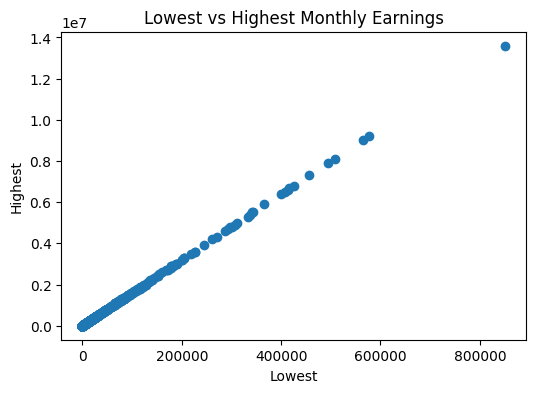

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(df['lowest_monthly_earnings'], df['highest_monthly_earnings'])
plt.title("Lowest vs Highest Monthly Earnings")
plt.xlabel("Lowest")
plt.ylabel("Highest")
plt.show()

10) Top Categories by Total Subscribers

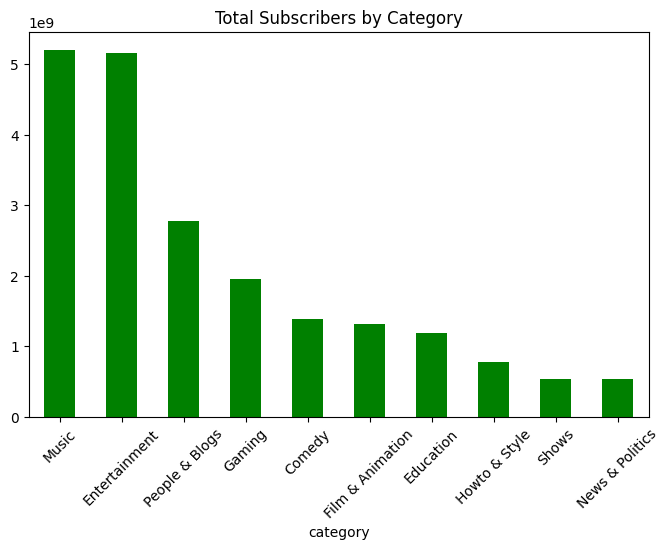

In [26]:
plt.figure(figsize=(8,5))
df.groupby('category')['subscribers'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title("Total Subscribers by Category")
plt.xticks(rotation=45)
plt.show()

11) Average Uploads by Category

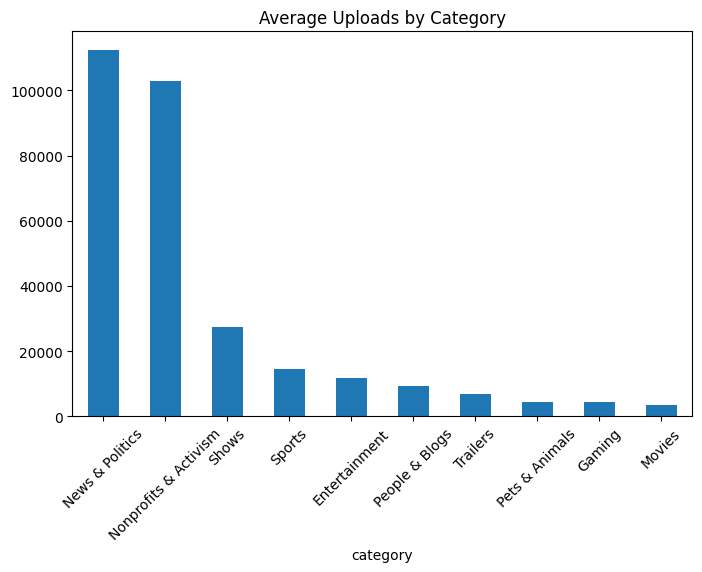

In [27]:
plt.figure(figsize=(8,5))
df.groupby('category')['uploads'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Average Uploads by Category")
plt.xticks(rotation=45)
plt.show()

12) Subscriber Rank Distribution

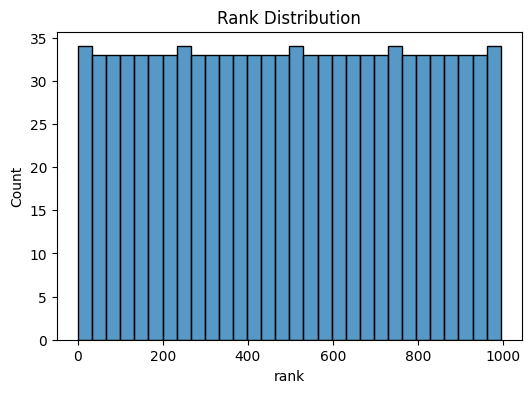

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df['rank'], bins=30)
plt.title("Rank Distribution")
plt.show()

13) Top Countries by Total Views

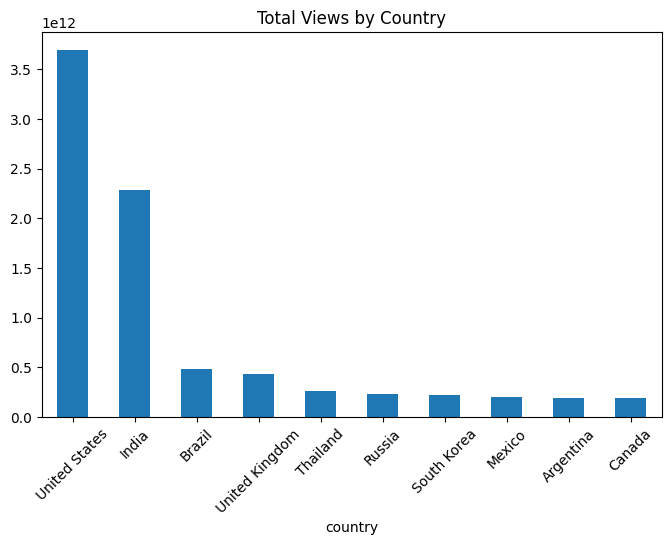

In [29]:
plt.figure(figsize=(8,5))
df.groupby('country')['video_views'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Total Views by Country")
plt.xticks(rotation=45)
plt.show()

14) Subscribers vs Uploads (Regression)

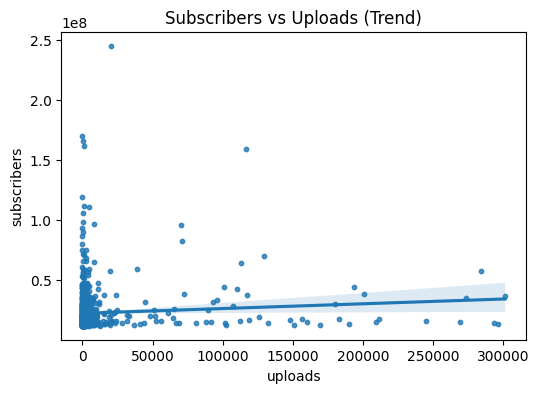

In [30]:
plt.figure(figsize=(6,4))
sns.regplot(x='uploads', y='subscribers', data=df, scatter_kws={'s':10})
plt.title("Subscribers vs Uploads (Trend)")
plt.show()

15) Heatmap – Category vs Average Subscribers

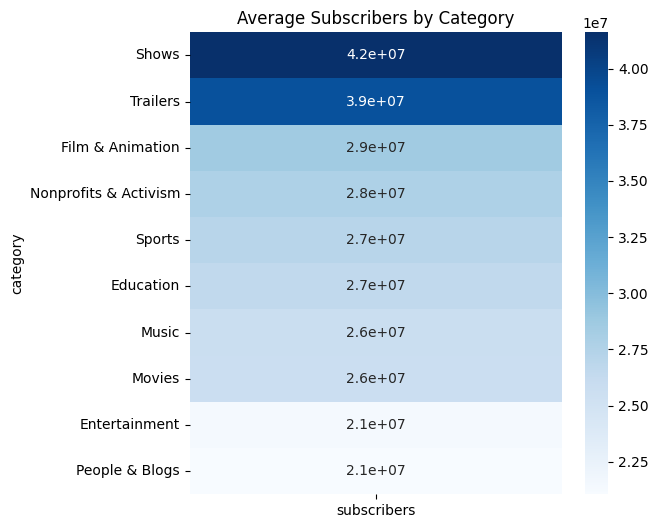

In [31]:
pivot = df.pivot_table(values='subscribers', index='category', aggfunc='mean').sort_values(by='subscribers', ascending=False).head(10)

plt.figure(figsize=(6,6))
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("Average Subscribers by Category")
plt.show()

# **5. For each analysis, write meaningful insights explaining:**

# **○ Key patterns and trends**

# **○ Relationships between variables**

# **○ Presence of outliers**

# **○ Practical or business interpretations of the observations**


# Insights for the 15 visual-based analyses using Seaborn or Matplotlib

**1) Top 10 Channels by Subscribers**

The bar chart shows a steep concentration of subscribers among a few leading channels. The difference between the top rank and lower ranks within the top ten is still very large.

**Outliers:** The highest channel stands far above the rest.

**Business meaning:** Brand deals and ad revenue are likely to focus heavily on these dominant influencers.

**2) Top 10 Channels by Views**

Top channels accumulate disproportionately high total views. A small ranking change often corresponds to billions of view differences.

**Trend:** Popularity is concentrated.

**Business meaning:** Viewer attention is monopolized by a limited group.

**3) Category Share (Pie Chart)**

A few categories contribute the majority of channels, while many others form small slices.

**Trend:** Creator interest clusters in mass-appeal genres.

**Business meaning:** High competition exists in dominant niches.

**4) Country Share (Pie Chart)**

Some countries clearly dominate the platform representation.

**Business meaning:** Infrastructure, language reach, and advertising markets may drive creator success.

**5) Cumulative Subscriber Growth**

The curve rises slowly at first and then sharply, indicating inequality.

**Outliers:** The steep end corresponds to mega creators.

**Business meaning:** The platform follows a winner-takes-most structure.

**6) Average Earnings per Category**

Certain categories generate far higher mean earnings.

**Relationship:** Monetization differs by niche.

**Business meaning:** Advertisers may pay premium rates in high-value segments.

**7) Median Subscribers per Category**

The median highlights typical performance and removes extreme influence.

**Trend:** Some categories maintain strong base audiences.

**Business meaning:** These niches provide more stable growth opportunities.

**8) Views per Upload**

Channels with fewer uploads sometimes achieve very high views per video.

**Relationship:** Productivity does not equal effectiveness.

**Business meaning:** Strategic content beats bulk posting.

**9) Lowest vs Highest Monthly Earnings**

Points generally move upward, meaning channels with higher minimum income also achieve higher peaks.

**Outliers:** Some creators experience extreme spikes.

**Business meaning:** Revenue potential scales rapidly with popularity.

**10) Total Subscribers by Category**

A few categories collectively own the majority of subscribers.

**Trend:** Audience attention is concentrated.

**Business meaning:** Entering these areas requires differentiation.

**11) Average Uploads by Category**

Some genres upload far more frequently than others.

**Business meaning:** Audience expectations vary — news & entertainment demand constant updates, while music may rely on major releases.

**12) Rank Distribution**

Ranks are distributed across the dataset, but performance differences between top and mid ranks are substantial.

**Business meaning:** Small rank improvements near the top can mean huge gains.

**13) Total Views by Country**

Countries with large digital populations generate significantly higher cumulative views.

**Business meaning:** Geography influences advertisement targeting and revenue.

**14) Subscribers vs Uploads (Regression)**

The regression line may slope upward slightly, but with wide scatter.

**Relationship:** Upload count has limited predictive power.

**Business meaning:** Engagement matters more than frequency.

**15) Heatmap – Category vs Average Subscribers**

Some categories show much higher intensity.

**Trend:** Clear leaders emerge in attracting audiences.

**Business meaning:** Niche selection is crucial for long-term growth.

# **6. Provide a brief summary of overall insights derived from the exploratory analysis.**

The exploratory analysis of the Global YouTube dataset demonstrates that channel performance, audience reach, and revenue generation are highly concentrated among a small group of creators. Most channels contribute modest subscriber numbers, while a limited set of top performers dominate views and earnings, creating a clear imbalance across the platform. This inequality is consistently visible in ranking charts, cumulative trends, and category-wise aggregations.

Subscriber count shows strong influence on total views and revenue, but it is not the only factor. Differences across categories reveal that some niches achieve better monetization even with similar audience sizes, suggesting the importance of advertiser demand and viewer demographics. Country-level analysis further indicates that a few regions produce a major share of global influence, likely supported by stronger digital ecosystems and market size.

Another key observation is that upload frequency alone does not ensure success. Several channels with fewer uploads achieve higher engagement per video, highlighting the value of content quality, brand identity, and virality. Overall, sustainable growth on YouTube appears to depend on a combination of audience building, strategic category selection, and effective monetization rather than sheer production volume.